In [107]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
test = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0],
        [0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0],
        [0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0],
        [0,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0],
        [0,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0],
        [0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0],
        [0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,1,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

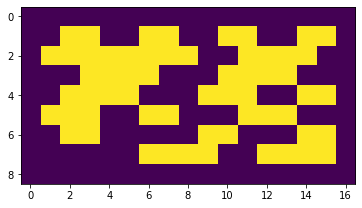

In [111]:
plt.imshow(np.asarray(test))

In [121]:
# neighbor implementation

# for i in range(len(test)): # string
#     for j in range(len(test[0])): # el in string
#         print ('row:',i, 'string', j,'.pixel value', test[i][j])
#         # find west neighbore:
#         if j!=0: # by element on the string
#             print ('p_w', test[i][j-1])
#         else:
#             print ('\t no_west')
#         # find north neighbore
#         if i!=0: # by string
#             print ("p_n", test[i-1][j])
#         else:
#             print ('\t no north')
#     print ('__end_string__')
#     print ('\n')

## first pass

In [136]:
labeling = {}
equivalent_relation = []
label = 1
for i in range(len(test)): # string
    for j in range(len(test[0])): # el in string
        
        pixel = test[i][j]
        neighbors = []

        if pixel == 0: # element is font condition!!!!
            labeling[i,j] = 0
    ### SET ALL NEIGHBORS WITH THEIR LABELING ####
        else:
            
            if j!=0:
                west = test[i][j-1]  ## pixel of the West!
                label_west = labeling[i,j-1]
                neighbors += [[west, label_west]]
            else:
                pass

            if i!=0:
                north = test[i-1][j]   ## pixel of the North!!!
                label_north = labeling[i-1,j]
                neighbors += [[north, label_north]]
            else:
                pass

            if i!=0 and j!=0:
                north_west = test[i-1][j-1]   ## pixel of the North-West!!!
                label_north_west = labeling[i-1,j-1]
                neighbors += [[north_west, label_north_west]]
            else:
                pass 

            if i!=0 and j<len(test[0])-1:
                north_east = test[i-1][j+1]   ## pixel of the North-East!!!
                label_north_east = labeling[i-1,j+1]
                neighbors += [[north_east, label_north_east]]
            else:
                pass

            if len(neighbors) == 0:
                labeling[i,j] = label
                label += 1

            else:
                midle_label = []
               # print (neighbors)
                for n in neighbors:
                   # print (n[0])
                    if n[0] == pixel:
                        midle_label += [n[1]]

                if len(midle_label) == 0:   
                    labeling[i,j] = label
                    label += 1
                else:
                    relation = np.unique(midle_label) # create equiv label for replace
                    if len(relation)>1 and relation.tolist() not in equivalent_relation:
                        equivalent_relation += [relation.tolist()] # add for second circle
                    labeling[i,j] = min(midle_label)

In [123]:
# create matrix from index
matrix = []
for i in range(len(test)):
    string = []
    for j in range(0,len(test[0])):
        string += [labeling[i,j]]
    matrix += [string]

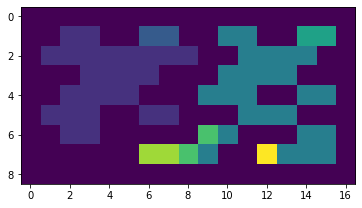

In [122]:
plt.imshow(np.asarray(matrix))

## SECOND PASS

In [200]:
# equivalent relations implementation

indexes = np.unique(equivalent_relation).tolist()


res = []
dict_res = {}
for i in equivalent_relation:
    result = []

    for j in equivalent_relation:
        for el in j:
            if el in i:
                result.append(j)
        
    res = np.unique(result).tolist()
    if min(res) not in dict_res:
        lab = min(res)
        dict_res[lab]=[]
        dict_res[lab].append(res)
    else: # min res in dict
        dict_res[min(res)].append(res)
replace={}
for k,v in dict_res.items():
    replace[k] = np.unique(np.concatenate(v)).tolist()

reverse = {}
for k, v in replace.items():
    for ix in v:
        reverse[ix] = k
#replace

{1: [1, 2], 3: [3, 4, 5, 6, 7]}

In [208]:
# pass 2 
matrix = []
for i in range(len(test)):
    string = []
    for j in range(0,len(test[0])):
        set_label = labeling[i,j]
        if set_label in reverse:
            set_label = reverse[set_label]
        
        string += [set_label]
    matrix += [string]

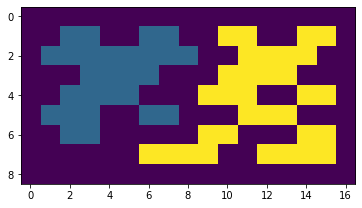

In [209]:
plt.imshow(matrix)